In [1]:
#Checking input data
!ls -al ../input/

total 8
drwxr-xr-x 3 root   root    4096 Jul 24 14:45 .
drwxr-xr-x 5 root   root    4096 Jul 24 14:45 ..
drwxr-xr-x 2 nobody nogroup    0 Jul 24 14:36 yelpzip


# Table of Contents:
1. Introduction
2. Imports
3. Data Merging And Cleaning 
3. Data Preprocessing
    1. Convert to lowercase
    2. Remove punctuation
    3. Tokenize the text
    4. Remove stopwords
    5. Lemmatize words
4. Reviews Exploratory Data Analysis
    1. Top Words Used in Reviews
    2. Top 10 users by reviews
    3. User Summary Statistics
5. Sentiment Analysis
    1. Positive 
    2. Negative 
    3. Neutral


# 1.Introduction:

This is basic exploration of the Yelp reviews dataset and performing cleaning and data preparation for.
The Yelp dataset is a collection of user-generated reviews and other information from the Yelp platform, which is a well-known online review site for local businesses. These reviews and information come from Yelpers themselves. We will be using Yelp dataset merged with YelpZip dataset to get a labelled dataset.

# 2. Imports:

In [2]:
!pip3 install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.5 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.3/772.3 kB 35.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# Words processing 
import json
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [45]:
!pip3 install seaborn
!pip3 install wordcloud
!pip3 install TextBlob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 8.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [7]:
# package imports
#basics
import numpy as np
import pandas as pd

#misc
import gc
import time
from datetime import datetime
import warnings
import os

#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")

%matplotlib inline

# 3. Data Merging and Cleaning:

In [8]:
# Review Dataset
labelled_reviews_df_columns = ['user_id','prod_id','date','text']
labelled_reviews_df = pd.read_csv('../input/yelpzip/reviewContent',sep='\t',header=None, names=labelled_reviews_df_columns)
labelled_reviews_df.head()

user_id  prod_id        date  \
0     5044        0  2014-11-16   
1     5045        0  2014-09-08   
2     5046        0  2013-10-06   
3     5047        0  2014-11-30   
4     5048        0  2014-08-28   

                                                text  
0  Drinks were bad, the hot chocolate was watered...  
1  This was the worst experience I've ever had a ...  
2  This is located on the site of the old Spruce ...  
3  I enjoyed coffee and breakfast twice at Toast ...  
4  I love Toast! The food choices are fantastic -...

In [9]:
# Metadata Of Reviews
labelled_metadata_df_columns = ['user_id','prod_id','rating','label','date']
labelled_metadata_df = pd.read_csv('../input/yelpzip/metadata',sep='\t',header =None, names=labelled_metadata_df_columns)
labelled_metadata_df.head()

user_id  prod_id  rating  label        date
0     5044        0     1.0     -1  2014-11-16
1     5045        0     1.0     -1  2014-09-08
2     5046        0     3.0     -1  2013-10-06
3     5047        0     5.0     -1  2014-11-30
4     5048        0     5.0     -1  2014-08-28

In [10]:
# Product Mapping 
labelled_product_df_columns = ['product','prod_id']
labelled_product_df = pd.read_csv('../input/yelpzip/productIdMapping',sep='\t',header =None, names=labelled_product_df_columns)
labelled_product_df.head()

product  prod_id
0                            Toast        0
1    Big Apple Lounge & Restaurant        1
2                       La Carreta        2
3                      Just Subs 6     2780
4  Formosa Asian Fusion Restaurant        4

In [11]:
# User Mapping
labelled_user_df_columns = ['user','user_id']
labelled_user_df = pd.read_csv('../input/yelpzip/userIdMapping',sep='\t',header =None, names=labelled_user_df_columns)
labelled_user_df.head()

user  user_id
0  L4ANPtyHW1eQeXxq3Tkm1w   154347
1  FzbqZaNONgR-b5iHpoGp8Q   185064
2  F1n8h7MtVHPxgY4U1iQ-bQ   205085
3  sd00TiP5ENkm6rKYPn3p3A    38645
4  9-QHBM5i9--nUYrrj9DXXA   133524

In [12]:
# Merged Dataframe
reviews = labelled_reviews_df.merge(labelled_metadata_df, on=['user_id', 'prod_id'], how='inner')
reviews = reviews.merge(labelled_product_df, on = ['prod_id'], how = 'inner')
reviews = reviews.merge(labelled_user_df, on = ['user_id'], how = 'inner')
reviews.head()

user_id  prod_id      date_x  \
0     5044        0  2014-11-16   
1     5045        0  2014-09-08   
2     5046        0  2013-10-06   
3     5046      376  2013-11-02   
4     5046      716  2013-10-02   

                                                text  rating  label  \
0  Drinks were bad, the hot chocolate was watered...     1.0     -1   
1  This was the worst experience I've ever had a ...     1.0     -1   
2  This is located on the site of the old Spruce ...     3.0     -1   
3  I am becoming frustrated with yelp.  I placed ...     3.0     -1   
4  The pumpkin pancakes are quite good but the pl...     3.0     -1   

       date_y             product                    user  
0  2014-11-16               Toast  wKW9oqOU259KkyJVxdsBqQ  
1  2014-09-08               Toast  BhUfh1gzKHj1ylGh2Dl_Eg  
2  2013-10-06               Toast  5Ck1lbYk3yVCgOcbYTTPww  
3  2013-11-02  Broad Street Diner  5Ck1lbYk3yVCgOcbYTTPww  
4  2013-10-02       Sabrinas Cafe  5Ck1lbYk3yVCgOcbYTTPww

In [13]:
# Drop rows with missing values
reviews.dropna(inplace=True)

In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608458 entries, 0 to 608457
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  608458 non-null  int64  
 1   prod_id  608458 non-null  int64  
 2   date_x   608458 non-null  object 
 3   text     608458 non-null  object 
 4   rating   608458 non-null  float64
 5   label    608458 non-null  int64  
 6   date_y   608458 non-null  object 
 7   product  608458 non-null  object 
 8   user     608458 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 41.8+ MB


# 4. Data Preprocessing:

In [15]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin the words into a single string
    text = ' '.join(words)

    return text

reviews['processed_text'] = reviews['text'].apply(preprocess_text)

In [16]:
reviews['date_review'] = pd.to_datetime(reviews['date_x'])
reviews['date_review'] = pd.to_datetime(reviews['date_review'], format='%Y%m%d')
reviews['month_review'] = reviews.date_review.dt.to_period('M')

In [17]:
reviews.drop(['date_x'], axis=1, inplace = True)
reviews.rename(columns = {'date_y':'date'}, inplace = True)
reviews.head()

user_id  prod_id                                               text  \
0     5044        0  Drinks were bad, the hot chocolate was watered...   
1     5045        0  This was the worst experience I've ever had a ...   
2     5046        0  This is located on the site of the old Spruce ...   
3     5046      376  I am becoming frustrated with yelp.  I placed ...   
4     5046      716  The pumpkin pancakes are quite good but the pl...   

   rating  label        date             product                    user  \
0     1.0     -1  2014-11-16               Toast  wKW9oqOU259KkyJVxdsBqQ   
1     1.0     -1  2014-09-08               Toast  BhUfh1gzKHj1ylGh2Dl_Eg   
2     3.0     -1  2013-10-06               Toast  5Ck1lbYk3yVCgOcbYTTPww   
3     3.0     -1  2013-11-02  Broad Street Diner  5Ck1lbYk3yVCgOcbYTTPww   
4     3.0     -1  2013-10-02       Sabrinas Cafe  5Ck1lbYk3yVCgOcbYTTPww   

                                      processed_text date_review month_review  
0  drink bad hot chocolate watered latte burnt ta...  2014-11-16      2014-11  
1  worst experience ive ever casual coffeelight f...  2014-09-08      2014-09  
2  located site old spruce st video mild cofee go...  2013-10-06      2013-10  
3  becoming frustrated yelp placed 20 review vari...  2013-11-02      2013-11  
4  pumpkin pancake quite good place expensive cro...  2013-10-02      2013-10

In [18]:
reviews['review_id'] = reviews['user_id'].astype(str) +"-"+ reviews["prod_id"].astype(str)

In [19]:
reviews.head()

user_id  prod_id                                               text  \
0     5044        0  Drinks were bad, the hot chocolate was watered...   
1     5045        0  This was the worst experience I've ever had a ...   
2     5046        0  This is located on the site of the old Spruce ...   
3     5046      376  I am becoming frustrated with yelp.  I placed ...   
4     5046      716  The pumpkin pancakes are quite good but the pl...   

   rating  label        date             product                    user  \
0     1.0     -1  2014-11-16               Toast  wKW9oqOU259KkyJVxdsBqQ   
1     1.0     -1  2014-09-08               Toast  BhUfh1gzKHj1ylGh2Dl_Eg   
2     3.0     -1  2013-10-06               Toast  5Ck1lbYk3yVCgOcbYTTPww   
3     3.0     -1  2013-11-02  Broad Street Diner  5Ck1lbYk3yVCgOcbYTTPww   
4     3.0     -1  2013-10-02       Sabrinas Cafe  5Ck1lbYk3yVCgOcbYTTPww   

                                      processed_text date_review month_review  \
0  drink bad hot chocolate watered latte burnt ta...  2014-11-16      2014-11   
1  worst experience ive ever casual coffeelight f...  2014-09-08      2014-09   
2  located site old spruce st video mild cofee go...  2013-10-06      2013-10   
3  becoming frustrated yelp placed 20 review vari...  2013-11-02      2013-11   
4  pumpkin pancake quite good place expensive cro...  2013-10-02      2013-10   

  review_id  
0    5044-0  
1    5045-0  
2    5046-0  
3  5046-376  
4  5046-716

In [21]:
subdirectory_path = '/kaggle/working/yelp-labelled-preprocessed-data'
os.makedirs(subdirectory_path, exist_ok=True)
reviews.to_csv(os.path.join(subdirectory_path, 'labelled_reviews.csv'), index=False)

# 5. Reviews Exploratory Data Analysis:

Lets look at some reviews related analysis regarding top reviews and most words used

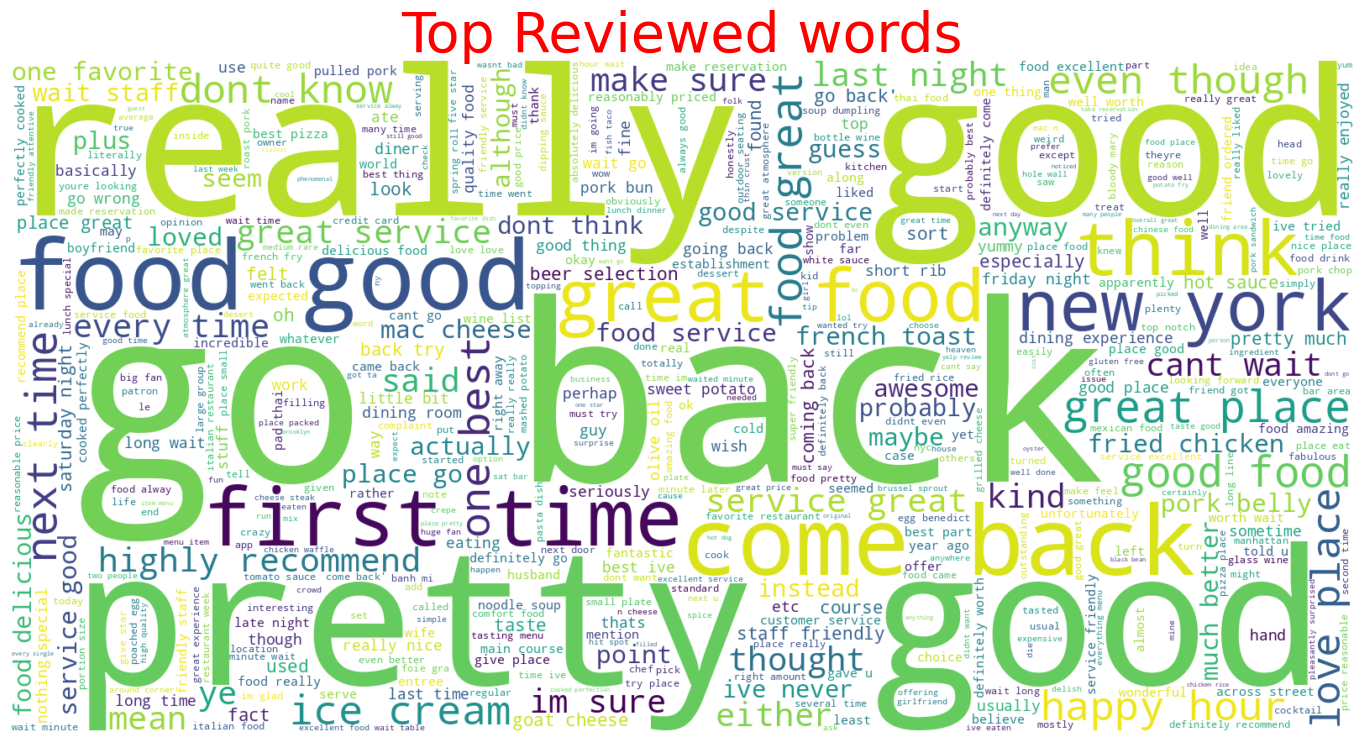

In [25]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(reviews['processed_text'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Reviewed words", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

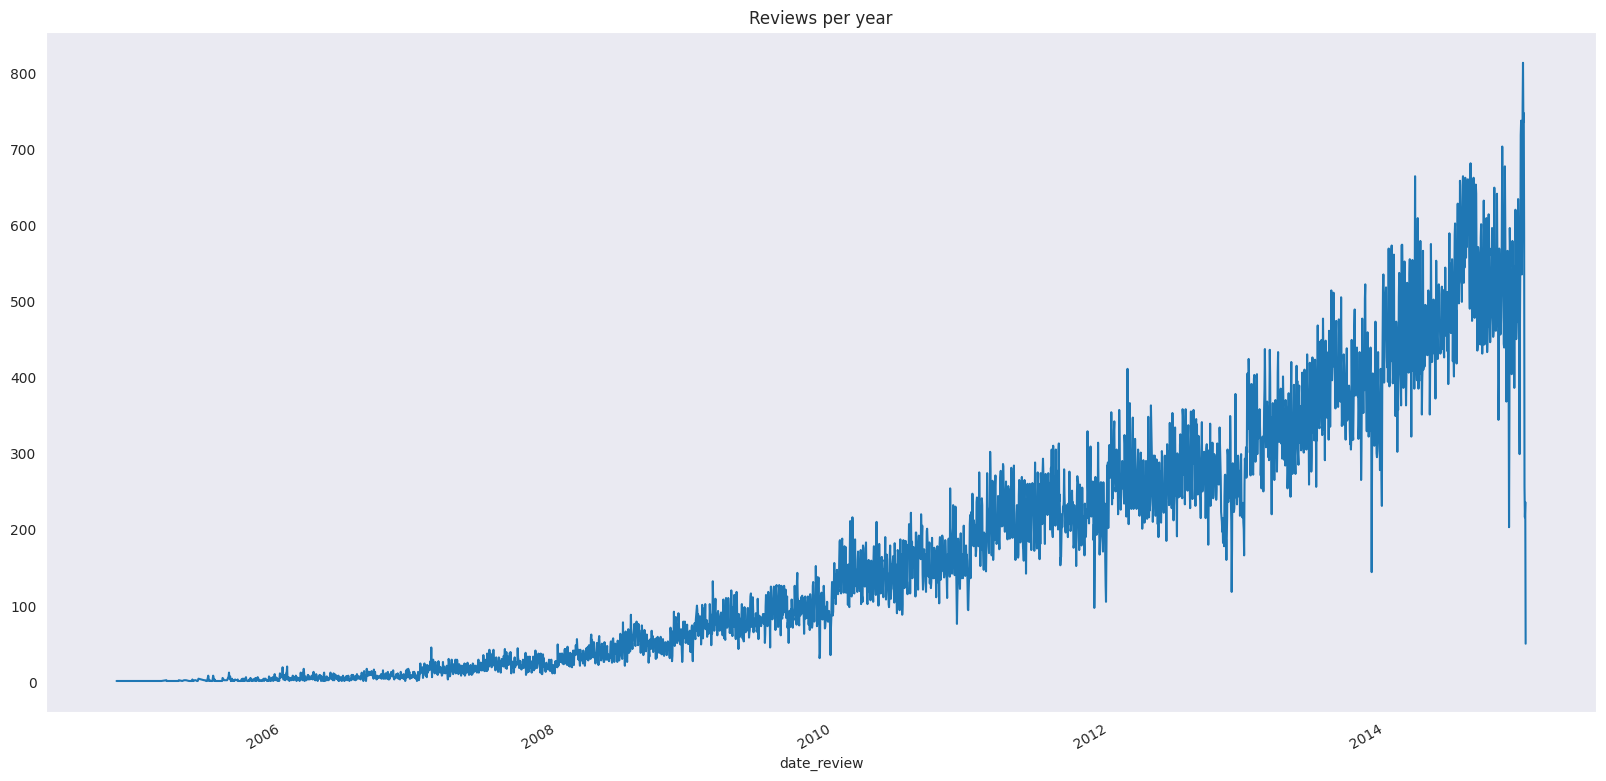

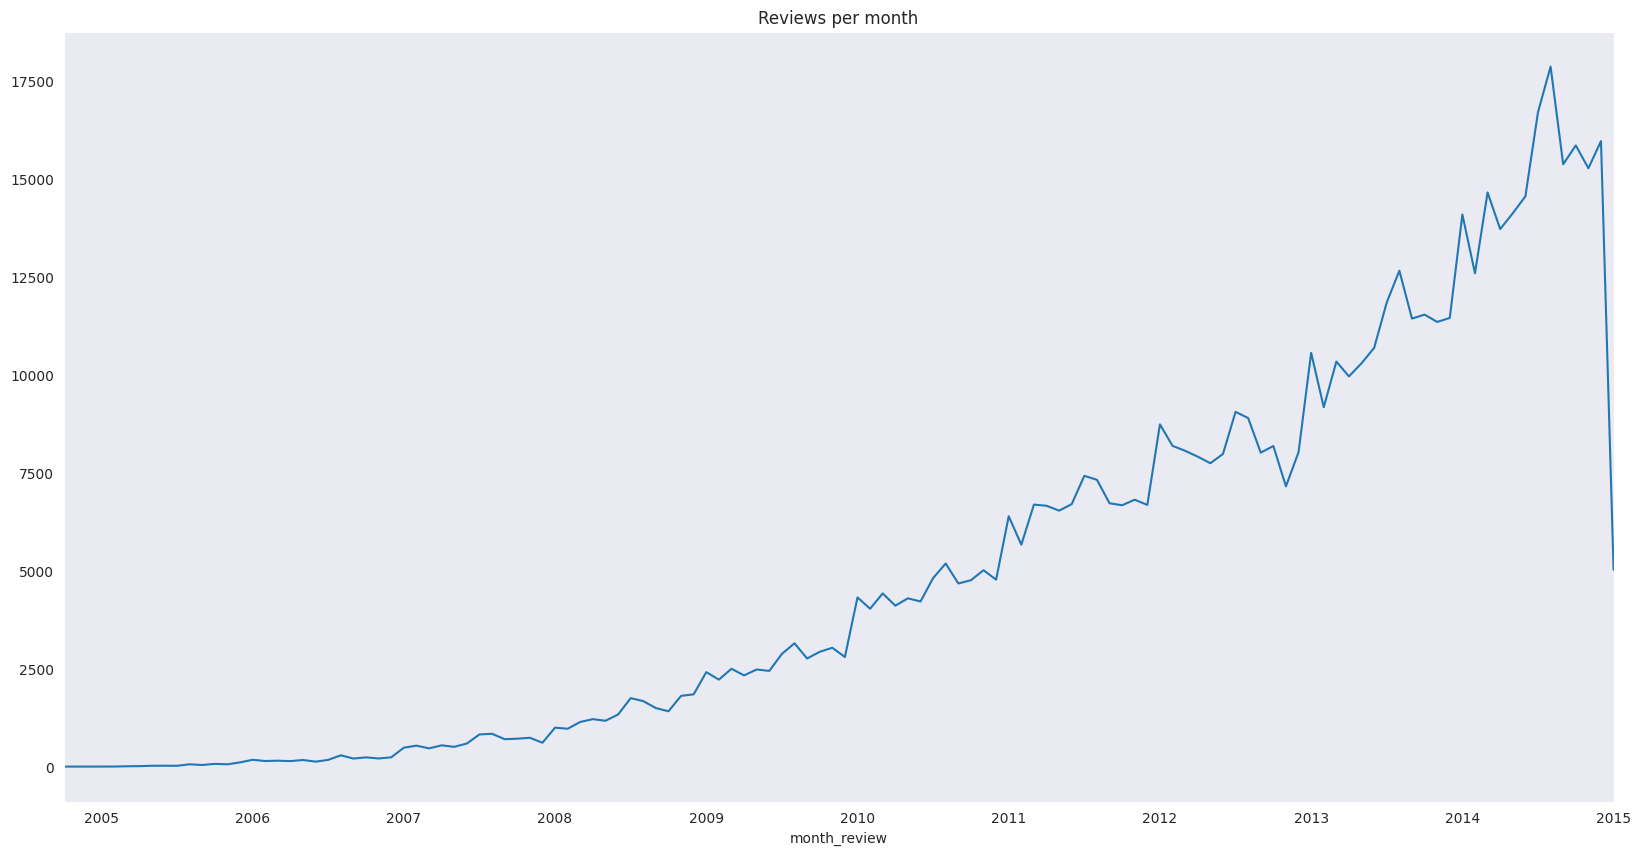

In [26]:
#Reviews per year and month

grp_date = reviews.groupby(['date_review'])['user_id'].count()
grp_month = reviews.groupby(['month_review'])['user_id'].count()

ts = pd.Series(grp_date)
ts.plot(kind='line', figsize=(20,10),title='Reviews per year')
plt.show()

ts = pd.Series(grp_month)
ts.plot(kind='line', figsize=(20,10),title='Reviews per month')
plt.show()

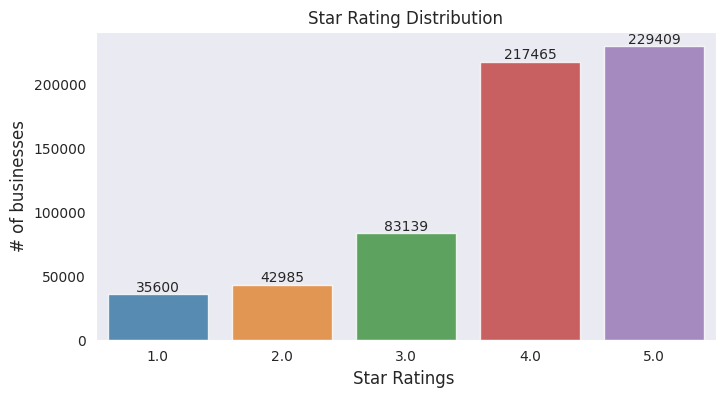

In [36]:
#Get the distribution of the ratings
x=labelled_metadata_df['rating'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x = x.index, y = x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

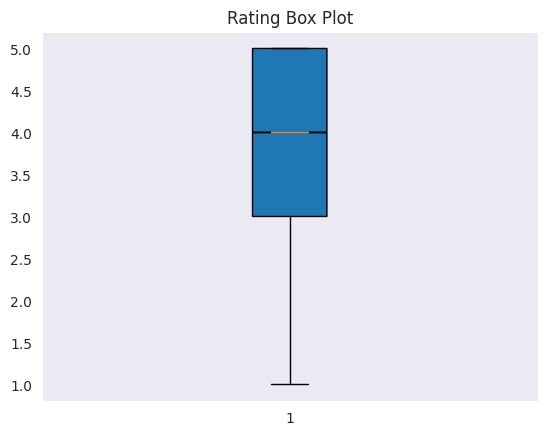

In [37]:
import matplotlib.pyplot as plot

plot.boxplot(reviews["rating"],notch='True',patch_artist=True)
plot.title("Rating Box Plot")
plot.show()

In [38]:
user_agg=reviews.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'label':['sum'], 'rating':['mean']})

In [39]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("Top 10 Users in Yelp")
user_agg.head(10)

Top 10 Users in Yelp


review_id        date             label    rating
            count         min         max   sum      mean
user_id                                                  
8367          197  2008-04-08  2014-12-01   197  3.979695
9501          185  2008-05-05  2015-01-06   185  4.367568
7871          178  2010-04-10  2014-12-28   178  3.853933
8225          159  2007-07-14  2015-01-01   159  4.207547
10934         155  2008-10-10  2014-12-03   155  4.161290
7781          142  2010-08-03  2014-12-31   142  3.830986
8351          142  2011-03-23  2014-11-13   142  3.908451
7777          136  2010-09-21  2015-01-04   136  3.485294
8467          135  2010-07-22  2014-12-08   135  4.081481
8011          133  2008-06-10  2014-12-24   133  3.909774

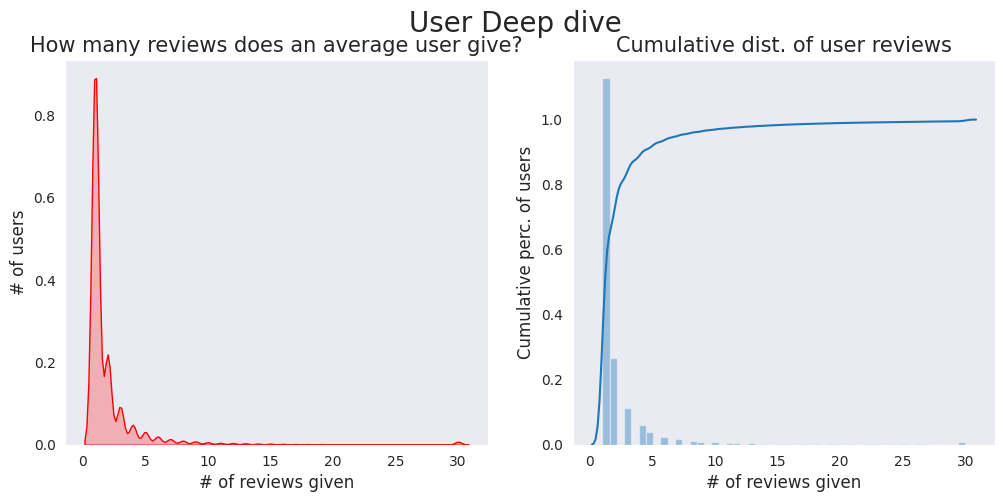

Took 2165.647575855255 s


In [40]:
# Cap max reviews to 30 for better visuals
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))
plt.suptitle("User Deep dive",fontsize=20)
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
#Cumulative Distribution
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()
end_time=time.time()
print("Took",end_time-start_time,"s")

~80% of the users write only about 5 reviews!

In [41]:
reviews.head()

user_id  prod_id                                               text  \
0     5044        0  Drinks were bad, the hot chocolate was watered...   
1     5045        0  This was the worst experience I've ever had a ...   
2     5046        0  This is located on the site of the old Spruce ...   
3     5046      376  I am becoming frustrated with yelp.  I placed ...   
4     5046      716  The pumpkin pancakes are quite good but the pl...   

   rating  label        date             product                    user  \
0     1.0     -1  2014-11-16               Toast  wKW9oqOU259KkyJVxdsBqQ   
1     1.0     -1  2014-09-08               Toast  BhUfh1gzKHj1ylGh2Dl_Eg   
2     3.0     -1  2013-10-06               Toast  5Ck1lbYk3yVCgOcbYTTPww   
3     3.0     -1  2013-11-02  Broad Street Diner  5Ck1lbYk3yVCgOcbYTTPww   
4     3.0     -1  2013-10-02       Sabrinas Cafe  5Ck1lbYk3yVCgOcbYTTPww   

                                      processed_text date_review month_review  \
0  drink bad hot chocolate watered latte burnt ta...  2014-11-16      2014-11   
1  worst experience ive ever casual coffeelight f...  2014-09-08      2014-09   
2  located site old spruce st video mild cofee go...  2013-10-06      2013-10   
3  becoming frustrated yelp placed 20 review vari...  2013-11-02      2013-11   
4  pumpkin pancake quite good place expensive cro...  2013-10-02      2013-10   

  review_id  
0    5044-0  
1    5045-0  
2    5046-0  
3  5046-376  
4  5046-716

In [42]:
prod_agg=reviews.groupby('product').agg({'review_id':['count'],
                                'label':['sum'], 'rating':['mean']}).sort_values([('review_id','count')],ascending=False)
prod_agg.head(10)

review_id label    rating
                              count   sum      mean
product                                            
Ippudo NY                      7378  5970  4.073597
The Halal Guys                 6632  5038  4.299306
Lombardi’s Pizza               4716  3314  3.944656
Grimaldi’s                     3935  2853  3.746125
Joe’s Shanghai                 3143  2691  3.801782
Pommes Frites                  3122  2760  4.157591
Totto Ramen                    2999  2611  3.965989
Pat’s King of Steaks           2959  1949  3.274417
Eataly NYC                     2943  2219  3.720014
Artichoke Basille’s Pizza      2848  2314  3.890449

# 6. Sentiment Analysis:

In [46]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [47]:
 from textblob import TextBlob

In [48]:
reviews['text_sentiment'] = reviews['processed_text'].apply(sentiment)

In [49]:
reviews['sentiment'] = ''
reviews['sentiment'][reviews['text_sentiment'] > 0] = 'positive'
reviews['sentiment'][reviews['text_sentiment'] < 0] = 'negative'
reviews['sentiment'][reviews['text_sentiment'] == 0] = 'neutral'

In [54]:
reviews['sentiment'] = reviews['sentiment'].astype('category')

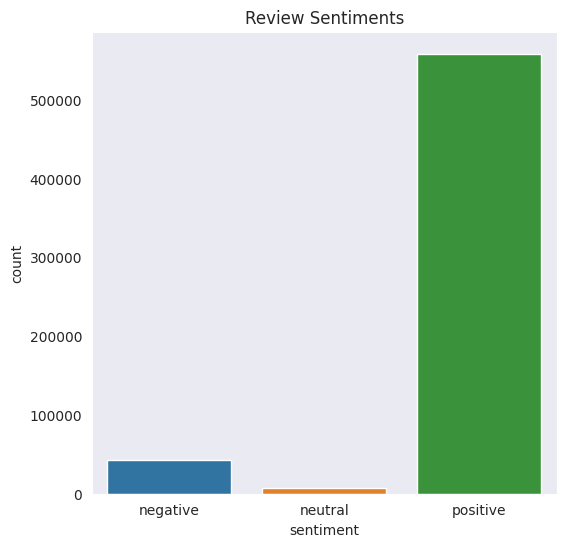

In [57]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x = 'sentiment', data = reviews)
plt.title('Review Sentiments');

In [58]:
reviews_posr = pd.DataFrame(reviews['processed_text'][ reviews['sentiment'] == 'positive'])
reviews_negr = pd.DataFrame(reviews['processed_text'][ reviews['sentiment'] == 'negative'])
reviews_neutr = pd.DataFrame(reviews['processed_text'][ reviews['sentiment'] == 'neutral'])

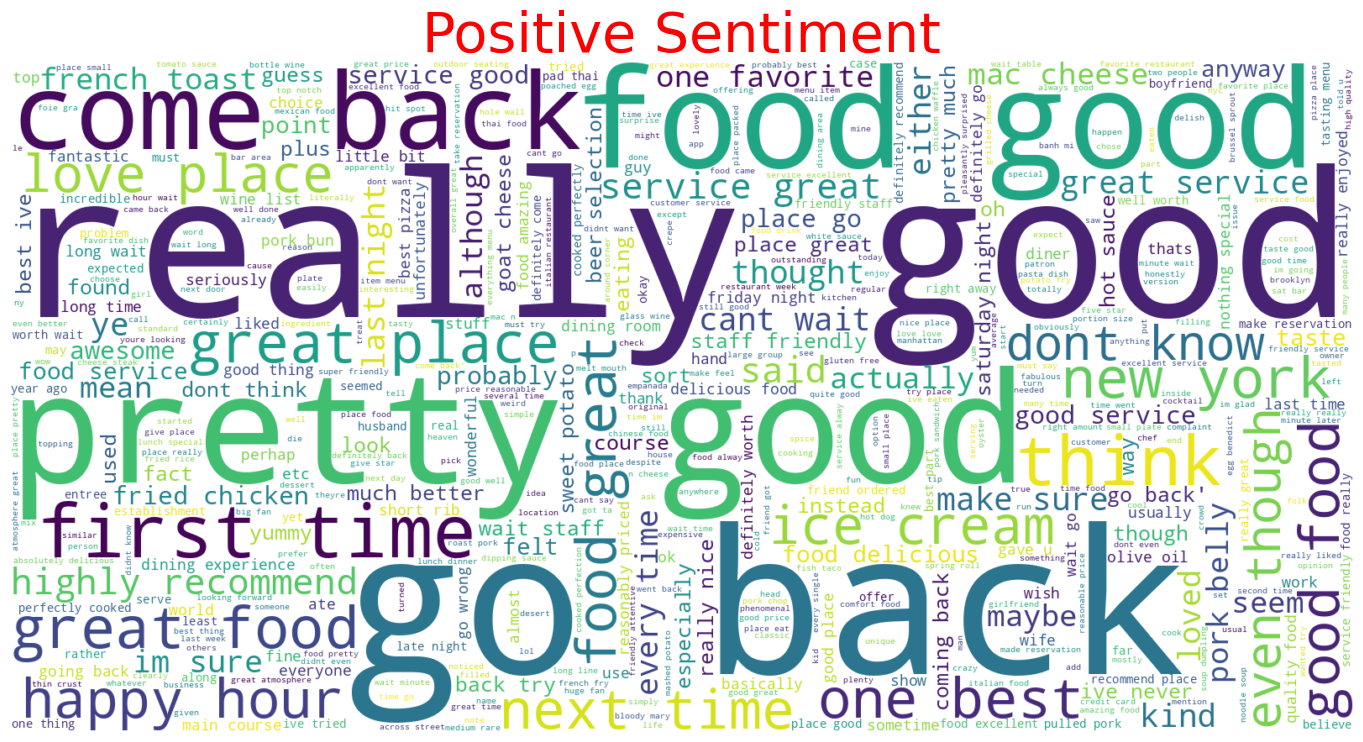

In [59]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(reviews_posr['processed_text'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

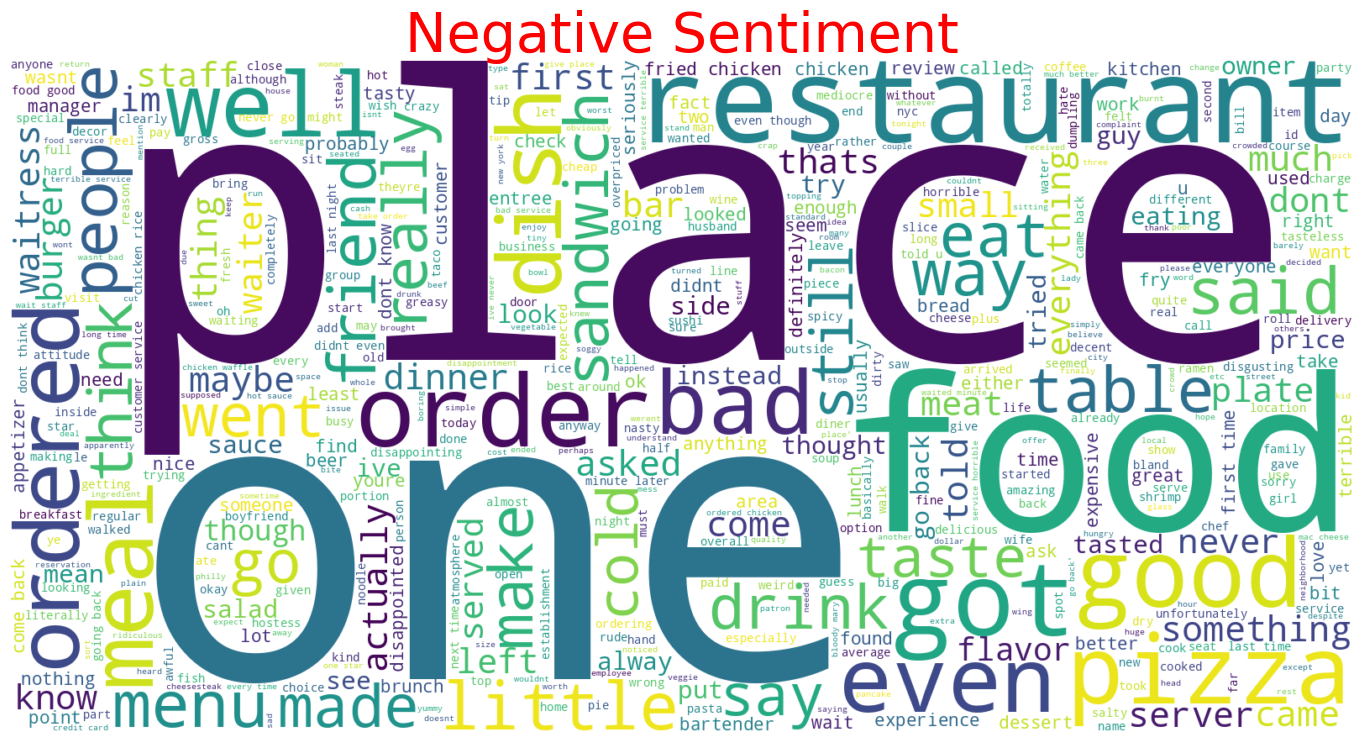

In [60]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(reviews_negr['processed_text'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Negative Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

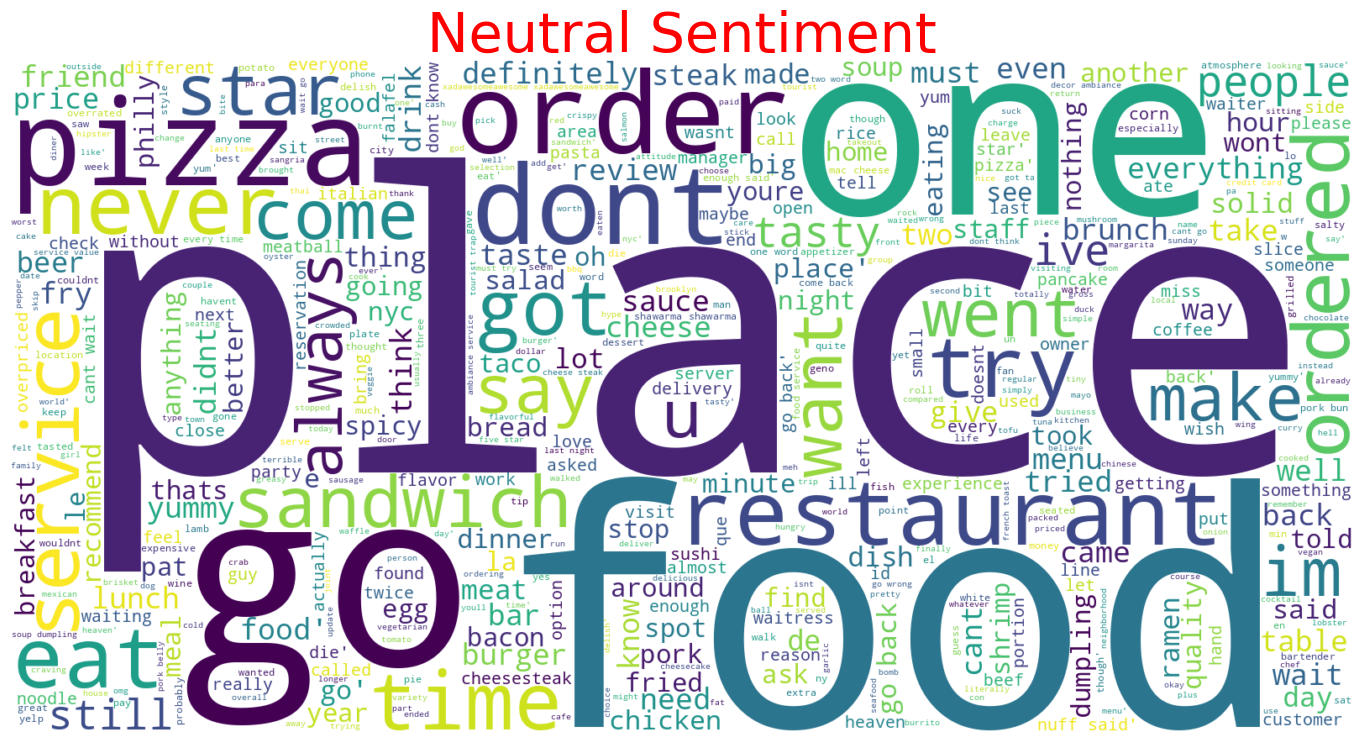

In [61]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(reviews_neutr['processed_text'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Neutral Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [64]:
reviews.head()

user_id  prod_id                                               text  \
0     5044        0  Drinks were bad, the hot chocolate was watered...   
1     5045        0  This was the worst experience I've ever had a ...   
2     5046        0  This is located on the site of the old Spruce ...   
3     5046      376  I am becoming frustrated with yelp.  I placed ...   
4     5046      716  The pumpkin pancakes are quite good but the pl...   

   rating  label        date             product                    user  \
0     1.0     -1  2014-11-16               Toast  wKW9oqOU259KkyJVxdsBqQ   
1     1.0     -1  2014-09-08               Toast  BhUfh1gzKHj1ylGh2Dl_Eg   
2     3.0     -1  2013-10-06               Toast  5Ck1lbYk3yVCgOcbYTTPww   
3     3.0     -1  2013-11-02  Broad Street Diner  5Ck1lbYk3yVCgOcbYTTPww   
4     3.0     -1  2013-10-02       Sabrinas Cafe  5Ck1lbYk3yVCgOcbYTTPww   

                                      processed_text date_review month_review  \
0  drink bad hot chocolate watered latte burnt ta...  2014-11-16      2014-11   
1  worst experience ive ever casual coffeelight f...  2014-09-08      2014-09   
2  located site old spruce st video mild cofee go...  2013-10-06      2013-10   
3  becoming frustrated yelp placed 20 review vari...  2013-11-02      2013-11   
4  pumpkin pancake quite good place expensive cro...  2013-10-02      2013-10   

  review_id  text_sentiment sentiment  
0    5044-0       -0.430000  negative  
1    5045-0        0.001128  positive  
2    5046-0        0.341667  positive  
3  5046-376        0.223750  positive  
4  5046-716        0.100000  positive

In [76]:
reviews['label'].value_counts()

label
 1    528019
-1     80439
Name: count, dtype: int64

In [77]:
subdirectory_path = '/kaggle/working/yelp-labelled-preprocessed-data'
os.makedirs(subdirectory_path, exist_ok=True)
reviews.to_csv(os.path.join(subdirectory_path, 'labelled_reviews.csv'), index=False)